## Loading Main Libraries

In [1]:
import pandas as pd

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import nltk

In [2]:
df = pd.read_csv("../input/train.tsv", sep="\t")

df_test = pd.read_csv("../input/test.tsv", sep="\t")

In [3]:
df.head(10)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [4]:
df_test.head(10)

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
5,156066,8545,intermittently pleasing but
6,156067,8545,intermittently pleasing
7,156068,8545,intermittently
8,156069,8545,pleasing
9,156070,8545,but


In [5]:
example = df[(df['PhraseId'] >= 0) & (df['PhraseId'] <= 2)]

print(example["Phrase"].values[0], " - Sentiment:", example["Sentiment"].values[0])

print()

print(example["Phrase"].values[1], " - Sentiment:", example["Sentiment"].values[1])

A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .  - Sentiment: 1

A series of escapades demonstrating the adage that what is good for the goose  - Sentiment: 2


In [6]:
example = df[(df['PhraseId'] >= 517) & (df['PhraseId'] <= 518)]

print(example["Phrase"].values[0], " - Sentiment:", example["Sentiment"].values[0])

print()

print(example["Phrase"].values[1], " - Sentiment:", example["Sentiment"].values[1])

As inept as big-screen remakes of The Avengers and The Wild Wild West .  - Sentiment: 1

As inept as big-screen remakes of The Avengers and The Wild Wild West  - Sentiment: 2


Below another example that the appearance punctuation symbol "," is important

In [7]:
example = df[(df['PhraseId'] >= 68) & (df['PhraseId'] <= 69)]

print(example["Phrase"].values[0], " - Sentiment:", example["Sentiment"].values[0])

print()

print(example["Phrase"].values[1], " - Sentiment:", example["Sentiment"].values[1])

quiet , introspective and entertaining  - Sentiment: 3

quiet  - Sentiment: 2


Below another example that the appearance punctuation symbol "!" is important

In [8]:
example = df[(df['PhraseId'] >= 10737) & (df['PhraseId'] <= 10738)]

print(example["Phrase"].values[0], " - Sentiment:", example["Sentiment"].values[0])

print()

print(example["Phrase"].values[1], " - Sentiment:", example["Sentiment"].values[1])

Just bring on the Battle Bots , please !  - Sentiment: 3

bring on the Battle Bots , please !  - Sentiment: 2


In [9]:
example = df[(df['PhraseId'] >= 22) & (df['PhraseId'] <= 24)]

print(example["Phrase"].values[0], " - Sentiment:", example["Sentiment"].values[0])

print()

print(example["Phrase"].values[1], " - Sentiment:", example["Sentiment"].values[1])

print()

print(example["Phrase"].values[2], " - Sentiment:", example["Sentiment"].values[2])

good for the goose  - Sentiment: 3

good  - Sentiment: 3

for the goose  - Sentiment: 2


In [10]:
example = df[(df['PhraseId'] >= 46) & (df['PhraseId'] <= 47)]

print(example["Phrase"].values[0], " - Sentiment:", example["Sentiment"].values[0])

print()

print(example["Phrase"].values[1], " - Sentiment:", example["Sentiment"].values[1])

amuses but none of which amounts to much of a story  - Sentiment: 2

amuses  - Sentiment: 3


In [11]:
def tokenize_the_text(phrases):
    
    from nltk.tokenize import word_tokenize
    from nltk.text import Text
    
    tokens = [word for word in phrases]
    tokens = [word.lower() for word in tokens]
    tokens = [word_tokenize(word) for word in tokens]
    
    return tokens

crude_tokens = tokenize_the_text(df.Phrase)
print(crude_tokens[0:10])

[['a', 'series', 'of', 'escapades', 'demonstrating', 'the', 'adage', 'that', 'what', 'is', 'good', 'for', 'the', 'goose', 'is', 'also', 'good', 'for', 'the', 'gander', ',', 'some', 'of', 'which', 'occasionally', 'amuses', 'but', 'none', 'of', 'which', 'amounts', 'to', 'much', 'of', 'a', 'story', '.'], ['a', 'series', 'of', 'escapades', 'demonstrating', 'the', 'adage', 'that', 'what', 'is', 'good', 'for', 'the', 'goose'], ['a', 'series'], ['a'], ['series'], ['of', 'escapades', 'demonstrating', 'the', 'adage', 'that', 'what', 'is', 'good', 'for', 'the', 'goose'], ['of'], ['escapades', 'demonstrating', 'the', 'adage', 'that', 'what', 'is', 'good', 'for', 'the', 'goose'], ['escapades'], ['demonstrating', 'the', 'adage', 'that', 'what', 'is', 'good', 'for', 'the', 'goose']]


In [12]:
def create_a_vocab(tokens):
    
    vocab = set()

    for sentence in tokens:
        for word in sentence:
            vocab.add(word)

    vocab = list(vocab)

    return vocab
    
vocab = create_a_vocab(crude_tokens)

print(len(vocab))
#print(type(vocab))
#print(sorted(vocab))

16540


## Deep Learning Techniques

In [13]:
# Keras Libraries
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, GRU, Conv1D, MaxPooling1D, Dropout, SpatialDropout1D, Bidirectional, Activation,GlobalAveragePooling1D, GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.models import load_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


Using TensorFlow backend.


In [14]:
import os,requests
def download(url):
    get_response = requests.get(url,stream=True)
    file_name  = url.split("/")[-1]
    with open(file_name, 'wb') as f:
        for chunk in get_response.iter_content(chunk_size=1024):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)
        

download("http://nlp.stanford.edu/data/glove.6B.zip")

### Export the GLoVe zip file.

In [15]:
import zipfile
with zipfile.ZipFile('glove.6B.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [16]:
import os
os.listdir()

['glove.6B.100d.txt',
 'glove.6B.zip',
 'glove.6B.300d.txt',
 'glove.6B.50d.txt',
 'glove.6B.200d.txt',
 '__notebook__.ipynb',
 '__output__.json']

### Reading the GLoVe embedding txt file

In [17]:
import numpy as np

embedding_dim = 300
filename = 'glove.6B.'+ str(embedding_dim) +'d.txt'

glove_w2v_embeddings_index = dict()
f = open(filename, "r", encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    glove_w2v_embeddings_index[word] = coefs
f.close()

In [18]:
df_test = pd.read_csv("../input/test.tsv", sep="\t")

###
tokens_uncleaned = tokenize_the_text(df.Phrase.values)
tokens_uncleaned_test = tokenize_the_text(df_test.Phrase.values)
sentences = [' '.join(sent) for sent in tokens_uncleaned]
sentences_test = [' '.join(sent) for sent in tokens_uncleaned_test]
all_corpus = sentences + sentences_test
###

vocab_all_corpus = create_a_vocab(tokens_uncleaned + tokens_uncleaned_test)
max_len = max([len(elem.split()) for elem in all_corpus])
#print(max_len)


tokenizer = Tokenizer(lower=True, filters='')
tokenizer.fit_on_texts(all_corpus)

vocabulary_size = len(tokenizer.word_index) + 1
#print(vocabulary_size)

X = tokenizer.texts_to_sequences(sentences)
y = df.Sentiment.values
X = pad_sequences(X, maxlen=max_len)


xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2, shuffle=True)

In [19]:
import textblob

embedding_matrix = np.zeros((vocabulary_size, embedding_dim + 2))

for word, i in tokenizer.word_index.items():
    if i > vocabulary_size:
        continue
    embedding_vector = glove_w2v_embeddings_index.get(word)
    word_sentiment = textblob.TextBlob(word).sentiment
    if embedding_vector is not None:
        embedding_matrix[i] = np.append(embedding_vector, [word_sentiment.polarity, word_sentiment.subjectivity])
    else:
        embedding_matrix[i, -2:] = [word_sentiment.polarity, word_sentiment.subjectivity]

In [20]:
def plot_history(history):
    acc = history.history['categorical_accuracy']
    val_acc = history.history['val_categorical_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [21]:
dl_performance_metrics_df = pd.DataFrame(columns=['accuracy','F1-score','training-time'], index=['LSTM', 'BiLSTM', 'CNN', 'LSTM_CNN', 'BiLSTM_CNN'])

In [22]:
def build_dl_lstm_model(xtrain, ytrain, xvalid, yvalid, num_of_epochs, filename):

    ## Network architecture
    from keras.utils import to_categorical
    from keras.callbacks import ModelCheckpoint
    from keras.callbacks import EarlyStopping
    from keras.layers import Masking
    from keras.initializers import Constant
    import time
    
    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)
    
    start_time = time.time()
    
    
    from numpy.random import seed
    seed(42)
    from tensorflow import set_random_seed
    set_random_seed(42)

    embedding_size= embedding_dim + 2
    batch_size = 128
    dropouts = 0.2
    epochs = num_of_epochs
    
    model=Sequential()
    model.add(Embedding(input_dim = vocabulary_size, output_dim = embedding_size, input_length = max_len, 
                        weights=[embedding_matrix], trainable = False, mask_zero=True))
    
    model.add(SpatialDropout1D(dropouts))
    
    model.add(LSTM(int(embedding_size/2), recurrent_dropout=dropouts, dropout=dropouts, return_sequences=False))
    
    model.add(Dense(5, activation='softmax'))

    print(model.summary())

    model.compile(loss='categorical_crossentropy', optimizer = 'nadam', metrics=['categorical_accuracy']) # RMSprop

    '''
    saves the model weights after each epoch if the val_acc loss decreased
    '''
    checkpointer = ModelCheckpoint(monitor='val_categorical_accuracy', mode='max', filepath=''+filename+'.hdf5', verbose=2, save_best_only=True)
    earlyStopping = EarlyStopping(monitor='val_categorical_accuracy', min_delta=0, patience=3, verbose=0, mode='max')

    history = model.fit(x = xtrain, y = to_categorical(ytrain), validation_data=(xvalid, to_categorical(yvalid)), epochs=epochs, batch_size=batch_size, verbose=2, callbacks=[checkpointer, earlyStopping])

    model = load_model(''+filename+'.hdf5')
    
    elapsed_time = time.time() - start_time
    
    return model, history, elapsed_time

In [23]:

dl_lstm_model, history_lstm, elapsed_time = build_dl_lstm_model(xtrain, ytrain, xvalid, yvalid, num_of_epochs=30, filename="lstm")
print("Elapsed time in seconds:", elapsed_time)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 56, 302)           5883564   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 56, 302)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 151)               274216    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 760       
Total params: 6,158,540
Trainable params: 274,976
Non-trainable params: 5,883,564
_________________________________________________________________
None
Train on 124848 samples, validate on 31212 samples
Epoch 1/30
 - 195s - loss: 0.9767 - categorical_accuracy: 0.6004 - val_loss: 0.8785 - val_categorical_accuracy: 0.6361

Epoch 00001: val_categorical_accuracy improved from -inf to 0.63613, saving model 

### Model Summary

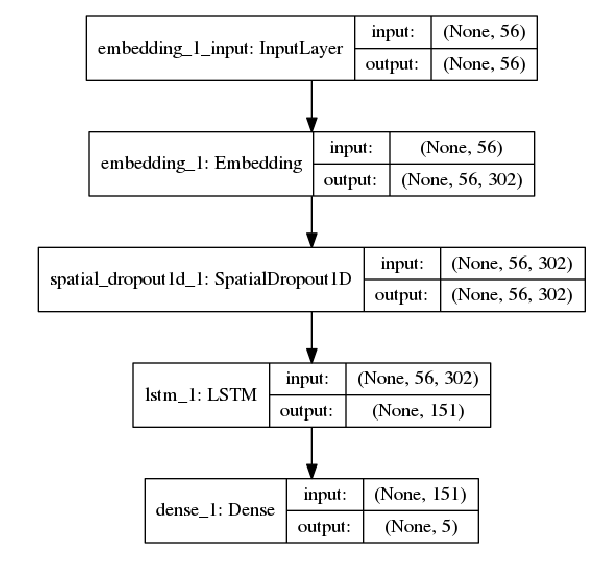

In [24]:
from keras.utils.vis_utils import plot_model

plot_model(dl_lstm_model, to_file='dl_lstm_model.png', show_shapes=True, show_layer_names=True)

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

img = Image.open('dl_lstm_model.png')
plt.rcParams["figure.figsize"] = (10,10)
plt.axis('off')
plt.grid(False)
imgplot = plt.imshow(img)

### Model Evaluation

31212/31212 [==============================] - 66s 2ms/step

              precision    recall  f1-score   support

           0       0.54      0.38      0.45      1414
           1       0.55      0.59      0.57      5455
           2       0.76      0.80      0.78     15917
           3       0.60      0.57      0.58      6585
           4       0.57      0.47      0.52      1841

   micro avg       0.67      0.67      0.67     31212
   macro avg       0.60      0.56      0.58     31212
weighted avg       0.67      0.67      0.67     31212


accuracy_score 0.6745482506728181

Weighted Averaged validation metrics
precision_score 0.6703808296494315
recall_score 0.6745482506728181
f1_score 0.6712995324677926

elapsed time: 2524 seconds


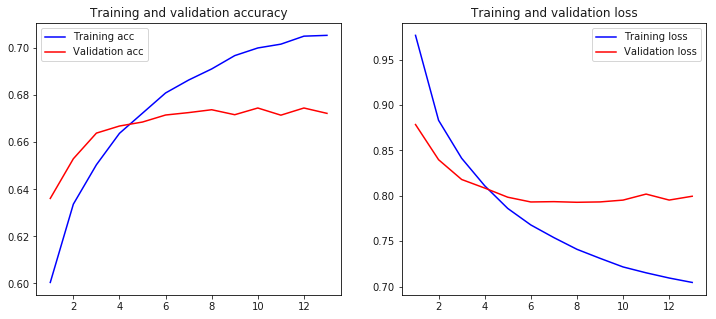

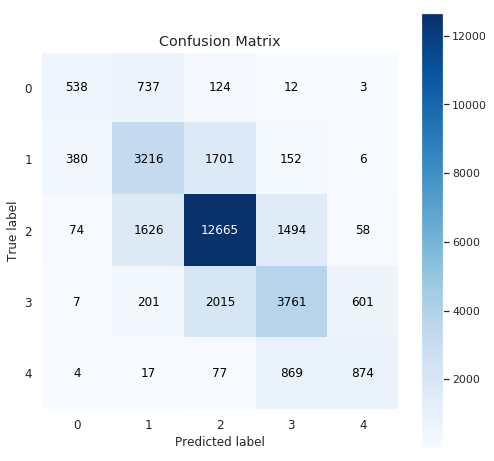

In [25]:
plot_history(history_lstm)

y_pred_lstm = dl_lstm_model.predict_classes(xvalid, verbose=1)
print()

print(classification_report(yvalid, y_pred_lstm))

print()
print("accuracy_score", accuracy_score(yvalid, y_pred_lstm))

print()
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(yvalid, y_pred_lstm, average='weighted'))
print("recall_score", recall_score(yvalid, y_pred_lstm, average='weighted'))
print("f1_score", f1_score(yvalid, y_pred_lstm, average='weighted'))

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, y_pred_lstm)

dl_performance_metrics_df.loc['LSTM']['training-time'] = elapsed_time
dl_performance_metrics_df.loc['LSTM']['accuracy'] = accuracy_score(yvalid, y_pred_lstm)
dl_performance_metrics_df.loc['LSTM']['F1-score'] = f1_score(yvalid, y_pred_lstm, average='weighted')

print("elapsed time:", round(elapsed_time), "seconds")

In [26]:
def build_dl_bidirectional_lstm_model(xtrain, ytrain, xvalid, yvalid, num_of_epochs, filename):

    ## Network architecture
    from keras.utils import to_categorical
    from keras.callbacks import ModelCheckpoint
    from keras.callbacks import EarlyStopping
    from keras.optimizers import RMSprop, SGD, adam
    from keras.layers import Masking
    from keras.initializers import Constant
    import time
    
    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)
    
    start_time = time.time()
    
    
    from numpy.random import seed
    seed(42)
    from tensorflow import set_random_seed
    set_random_seed(42)


    embedding_size= embedding_dim + 2
    batch_size = 256
    dropouts = 0.2
    epochs = num_of_epochs
    
    model=Sequential()
    model.add(Embedding(input_dim = vocabulary_size, output_dim = embedding_size, input_length=max_len, 
                        weights=[embedding_matrix], trainable = False, mask_zero=True))
    
    model.add(SpatialDropout1D(dropouts))
    
    model.add(Bidirectional(LSTM(int(embedding_size/2), recurrent_dropout=dropouts, dropout=dropouts, return_sequences=False)))
    
    model.add(Dense(5, activation='softmax'))

    print(model.summary())

    model.compile(loss='categorical_crossentropy', optimizer = 'nadam', metrics=['categorical_accuracy']) # RMSprop

    '''
    saves the model weights after each epoch if the val_acc loss decreased
    '''
    checkpointer = ModelCheckpoint(monitor='val_categorical_accuracy', mode='max', filepath=''+filename+'.hdf5', verbose=2, save_best_only=True)
    earlyStopping = EarlyStopping(monitor='val_categorical_accuracy', min_delta=0, patience=3, verbose=0, mode='max')

    history = model.fit(x = xtrain, y = to_categorical(ytrain), validation_data=(xvalid, to_categorical(yvalid)), epochs=epochs, batch_size=batch_size, verbose=2, callbacks=[checkpointer, earlyStopping])

    model = load_model(''+filename+'.hdf5')
    
    elapsed_time = time.time() - start_time
    
    return model, history, elapsed_time


In [27]:

dl_bidirectional_lstm_model, history_bidirectional_lstm, elapsed_time = build_dl_bidirectional_lstm_model(xtrain, ytrain, xvalid, yvalid, num_of_epochs=50, filename="bidirectional_lstm")
print("Elapsed time in seconds:", elapsed_time)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 56, 302)           5883564   
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 56, 302)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 302)               548432    
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1515      
Total params: 6,433,511
Trainable params: 549,947
Non-trainable params: 5,883,564
_________________________________________________________________
None
Train on 124848 samples, validate on 31212 samples
Epoch 1/50
 - 185s - loss: 0.9865 - categorical_accuracy: 0.5969 - val_loss: 0.8836 - val_categorical_accuracy: 0.6353

Epoch 00001: val_categorical_accuracy improved from -inf to 0.63533, saving model 

### Model Summary

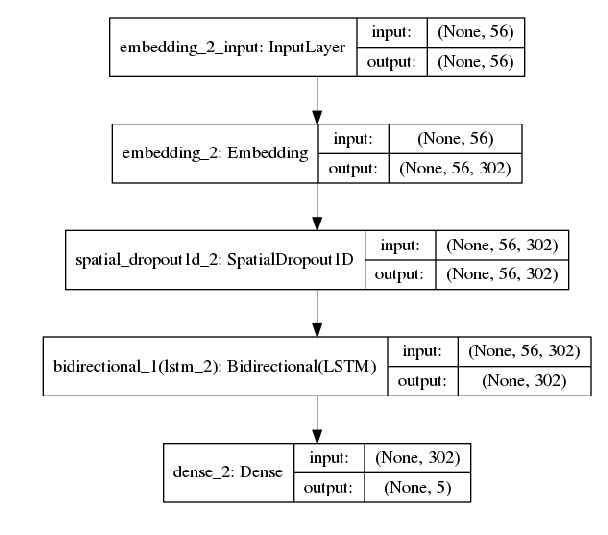

In [28]:
from keras.utils.vis_utils import plot_model

plot_model(dl_bidirectional_lstm_model, to_file='dl_bidirectional_lstm_model.png', show_shapes=True, show_layer_names=True)

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

img = Image.open('dl_bidirectional_lstm_model.png')
plt.rcParams["figure.figsize"] = (10,10)
plt.axis('off')
plt.grid(False)
imgplot = plt.imshow(img)

### Model Evaluation

31212/31212 [==============================] - 122s 4ms/step

              precision    recall  f1-score   support

           0       0.56      0.37      0.45      1414
           1       0.56      0.59      0.57      5455
           2       0.76      0.80      0.78     15917
           3       0.60      0.58      0.59      6585
           4       0.60      0.42      0.50      1841

   micro avg       0.68      0.68      0.68     31212
   macro avg       0.62      0.56      0.58     31212
weighted avg       0.67      0.68      0.67     31212


accuracy_score 0.6781366141227733

Weighted Averaged validation metrics
precision_score 0.6738188568474287
recall_score 0.6781366141227733
f1_score 0.6738389854771213

elapsed time: 1643 seconds


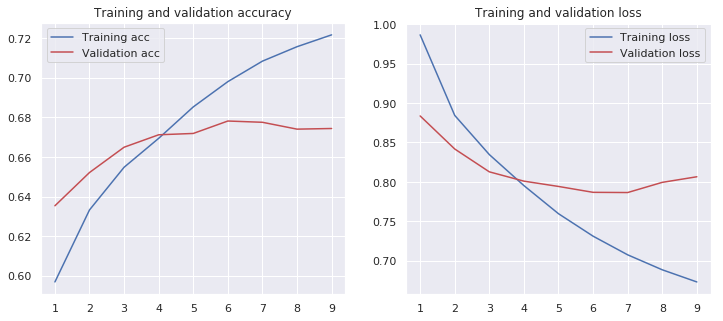

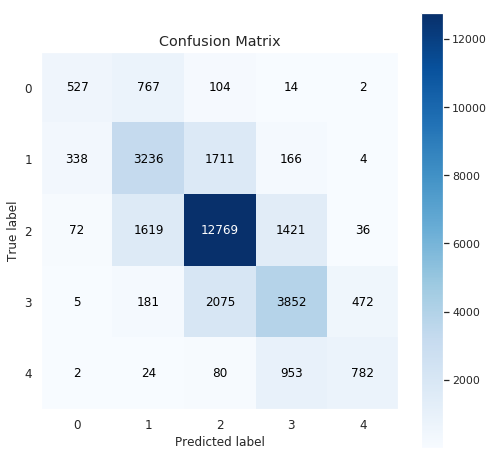

In [29]:
plot_history(history_bidirectional_lstm)

y_pred_bidirectional_lstm = dl_bidirectional_lstm_model.predict_classes(xvalid, verbose=1)
print()

print(classification_report(yvalid, y_pred_bidirectional_lstm))

print()
print("accuracy_score", accuracy_score(yvalid, y_pred_bidirectional_lstm))

print()
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(yvalid, y_pred_bidirectional_lstm, average='weighted'))
print("recall_score", recall_score(yvalid, y_pred_bidirectional_lstm, average='weighted'))
print("f1_score", f1_score(yvalid, y_pred_bidirectional_lstm, average='weighted'))

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, y_pred_bidirectional_lstm)


dl_performance_metrics_df.loc['BiLSTM']['training-time'] = elapsed_time
dl_performance_metrics_df.loc['BiLSTM']['accuracy'] = accuracy_score(yvalid, y_pred_bidirectional_lstm)
dl_performance_metrics_df.loc['BiLSTM']['F1-score'] = f1_score(yvalid, y_pred_bidirectional_lstm, average='weighted')

print("elapsed time:", round(elapsed_time), "seconds")

In [30]:
def build_dl_cnn_model(xtrain, ytrain, xvalid, yvalid, num_of_epochs, filename):

    ## Network architecture
    from keras.utils import to_categorical
    from keras.callbacks import ModelCheckpoint
    from keras.callbacks import EarlyStopping
    from keras.optimizers import RMSprop, SGD, adam
    from keras.layers import Masking
    from keras.initializers import Constant
    import time
    
    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)
    
    start_time = time.time()
    
    
    from numpy.random import seed
    seed(42)
    from tensorflow import set_random_seed
    set_random_seed(42)

    embedding_size= embedding_dim + 2
    batch_size = 128
    dropouts = 0.2
    epochs = num_of_epochs
    
    model=Sequential()
    model.add(Embedding(input_dim = vocabulary_size, output_dim = embedding_size, input_length=max_len, 
                        weights=[embedding_matrix], trainable = False))
    
    model.add(SpatialDropout1D(dropouts))
        
    model.add(Conv1D(128, kernel_size = 1, strides = 1,  padding='valid', activation='relu'))
    model.add(Conv1D(256, kernel_size = 3, strides = 1,  padding='valid', activation='relu'))
    model.add(Conv1D(512, kernel_size = 5, strides = 1,  padding='valid', activation='relu'))
    
    model.add(GlobalMaxPooling1D())
    model.add(Dropout(dropouts))

    model.add(Dense(int(embedding_size/2), activation="relu"))
    model.add(Dropout(dropouts))
    
    model.add(Dense(5, activation='softmax'))

    print(model.summary())

    model.compile(loss='categorical_crossentropy', optimizer = 'nadam', metrics=['categorical_accuracy'])

    '''
    saves the model weights after each epoch if the val_acc loss decreased
    '''
    checkpointer = ModelCheckpoint(monitor='val_categorical_accuracy', mode='max', filepath=''+filename+'.hdf5', verbose=2, save_best_only=True)
    earlyStopping = EarlyStopping(monitor='val_categorical_accuracy', min_delta=0, patience=3, verbose=0, mode='max')

    history = model.fit(x = xtrain, y = to_categorical(ytrain), validation_data=(xvalid, to_categorical(yvalid)), epochs=epochs, batch_size=batch_size, verbose=2, callbacks=[checkpointer, earlyStopping])

    model = load_model(''+filename+'.hdf5')
    
    elapsed_time = time.time() - start_time
    
    return model, history, elapsed_time


In [31]:

dl_cnn_model, history_cnn, elapsed_time = build_dl_cnn_model(xtrain, ytrain, xvalid, yvalid, num_of_epochs=30, filename="cnn")
print("Elapsed time in seconds:", elapsed_time)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 56, 302)           5883564   
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 56, 302)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 56, 128)           38784     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 54, 256)           98560     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 50, 512)           655872    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
__________

### Model Summary

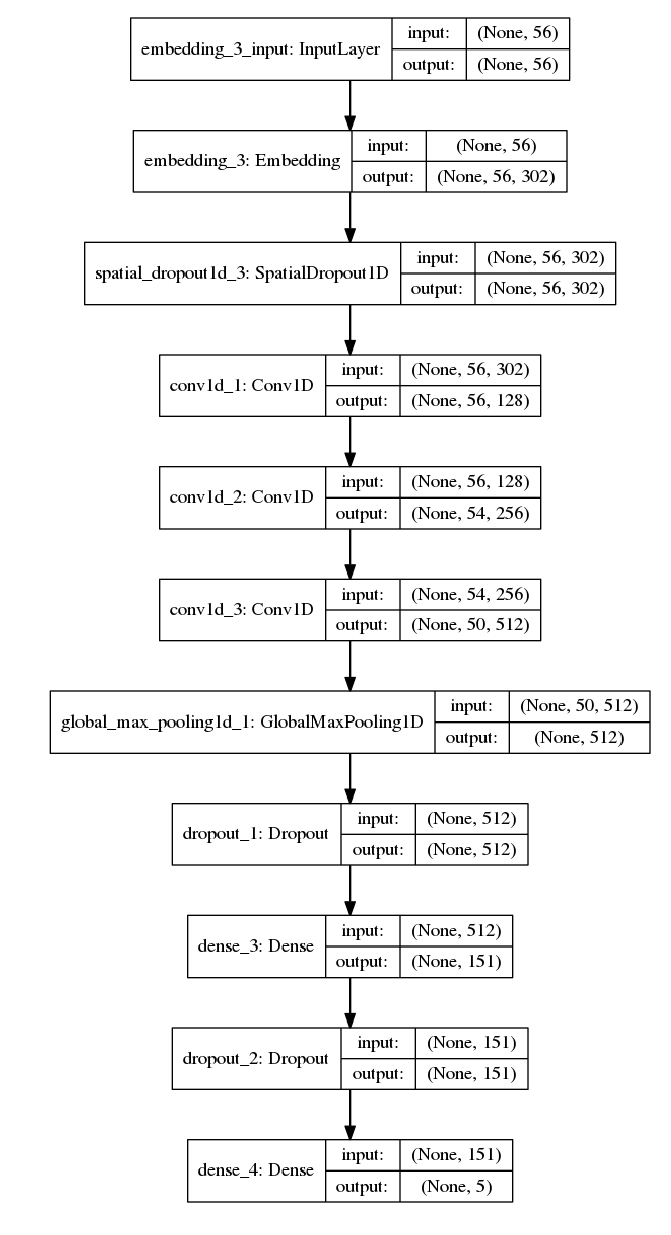

In [32]:
from keras.utils.vis_utils import plot_model

plot_model(dl_cnn_model, to_file='dl_cnn_model.png', show_shapes=True, show_layer_names=True)

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

img = Image.open('dl_cnn_model.png')
plt.rcParams["figure.figsize"] = (21,22)
plt.axis('off')
plt.grid(False)
imgplot = plt.imshow(img)

### Model Evaluation

31212/31212 [==============================] - 4s 124us/step

              precision    recall  f1-score   support

           0       0.62      0.26      0.37      1414
           1       0.56      0.62      0.59      5455
           2       0.76      0.81      0.78     15917
           3       0.62      0.54      0.58      6585
           4       0.57      0.49      0.53      1841

   micro avg       0.68      0.68      0.68     31212
   macro avg       0.62      0.55      0.57     31212
weighted avg       0.67      0.68      0.67     31212


accuracy_score 0.679033704985262

Weighted Averaged validation metrics
precision_score 0.674779461401448
recall_score 0.679033704985262
f1_score 0.6721142557563679

elapsed time: 353 seconds


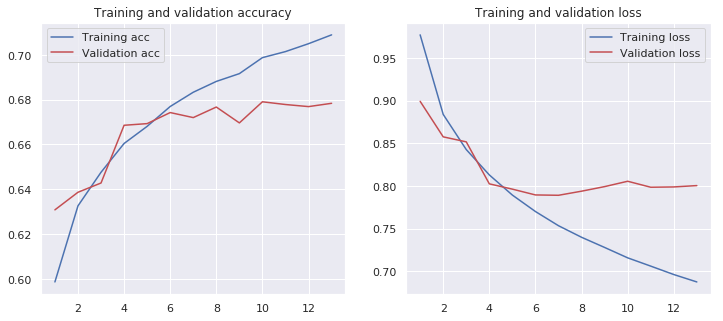

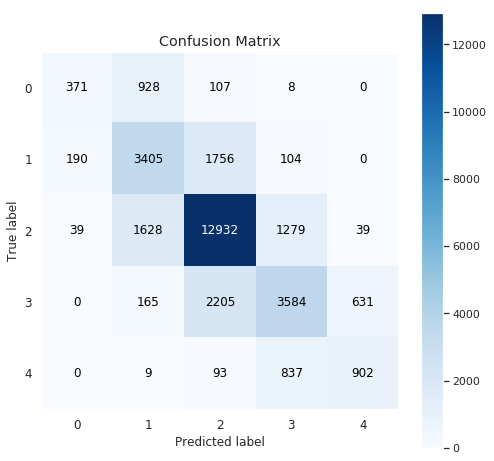

In [33]:
plot_history(history_cnn)

y_pred_cnn = dl_cnn_model.predict_classes(xvalid, verbose=1)
print()

print(classification_report(yvalid, y_pred_cnn))

print()
print("accuracy_score", accuracy_score(yvalid, y_pred_cnn))

print()
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(yvalid, y_pred_cnn, average='weighted'))
print("recall_score", recall_score(yvalid, y_pred_cnn, average='weighted'))
print("f1_score", f1_score(yvalid, y_pred_cnn, average='weighted'))

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, y_pred_cnn)


dl_performance_metrics_df.loc['CNN']['training-time'] = elapsed_time
dl_performance_metrics_df.loc['CNN']['accuracy'] = accuracy_score(yvalid, y_pred_cnn)
dl_performance_metrics_df.loc['CNN']['F1-score'] = f1_score(yvalid, y_pred_cnn, average='weighted')

print("elapsed time:", round(elapsed_time), "seconds")

In [34]:
def build_dl_lstm_cnn_model(xtrain, ytrain, xvalid, yvalid, num_of_epochs, filename):

    ## Network architecture
    from keras.utils import to_categorical
    from keras.callbacks import ModelCheckpoint
    from keras.callbacks import EarlyStopping
    from keras.optimizers import RMSprop, SGD, adam
    from keras.layers import Masking
    from keras.initializers import Constant
    import time
    
    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)
    
    start_time = time.time()
    
    
    from numpy.random import seed
    seed(42)
    from tensorflow import set_random_seed
    set_random_seed(42)


    embedding_size= embedding_dim + 2 #128
    batch_size = 128
    dropouts = 0.2
    epochs = num_of_epochs
    
    model=Sequential()
    model.add(Embedding(input_dim = vocabulary_size, output_dim = embedding_size, input_length=max_len, 
                        weights=[embedding_matrix], trainable = False))
    
    model.add(SpatialDropout1D(dropouts))
    
    model.add(LSTM(int(embedding_size/2), recurrent_dropout=dropouts, dropout=dropouts, 
                   return_sequences=True))
    
    model.add(Conv1D(128, kernel_size = 1, strides = 1,  padding='valid', activation='relu'))
    model.add(Conv1D(256, kernel_size = 3, strides = 1,  padding='valid', activation='relu'))
    model.add(Conv1D(512, kernel_size = 5, strides = 1,  padding='valid', activation='relu'))
    
    model.add(GlobalMaxPooling1D())
    model.add(Dropout(dropouts))

    model.add(Dense(int(embedding_size/2), activation="relu"))
    model.add(Dropout(dropouts))
    
    model.add(Dense(5, activation='softmax'))

    print(model.summary())

    model.compile(loss='categorical_crossentropy', optimizer = 'nadam', metrics=['categorical_accuracy']) # RMSprop

    '''
    saves the model weights after each epoch if the val_acc loss decreased
    '''
    checkpointer = ModelCheckpoint(monitor='val_categorical_accuracy', mode='max', filepath=''+filename+'.hdf5', verbose=2, save_best_only=True)
    earlyStopping = EarlyStopping(monitor='val_categorical_accuracy', min_delta=0, patience=3, verbose=0, mode='max')

    history = model.fit(x = xtrain, y = to_categorical(ytrain), validation_data=(xvalid, to_categorical(yvalid)), epochs=epochs, batch_size=batch_size, verbose=2, callbacks=[checkpointer, earlyStopping])

    model = load_model(''+filename+'.hdf5')
    
    elapsed_time = time.time() - start_time
    
    return model, history, elapsed_time


In [35]:

dl_lstm_cnn_model, history_lstm_cnn, elapsed_time = build_dl_lstm_cnn_model(xtrain, ytrain, xvalid, yvalid, num_of_epochs=30, filename="lstm_cnn")
print("Elapsed time in seconds:", elapsed_time)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 56, 302)           5883564   
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 56, 302)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 56, 151)           274216    
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 56, 128)           19456     
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 54, 256)           98560     
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 50, 512)           655872    
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 512)               0         
__________

### Model Summary

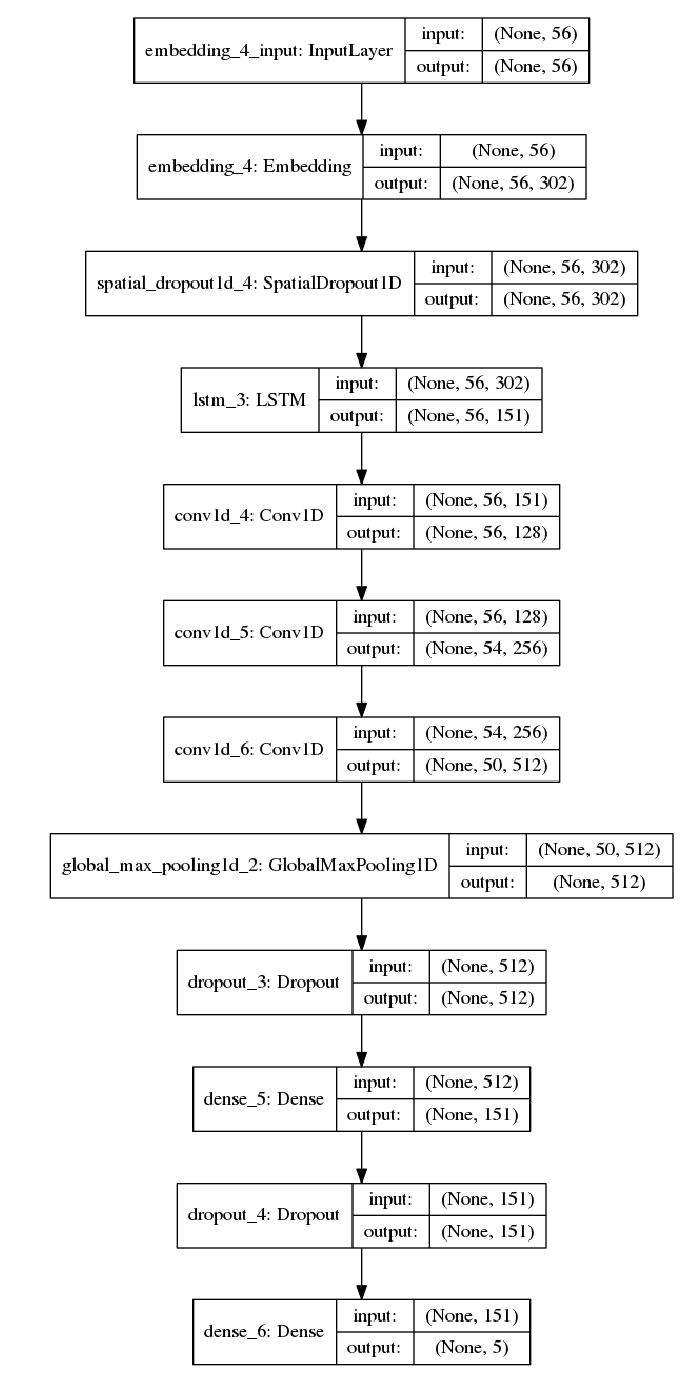

In [36]:
from keras.utils.vis_utils import plot_model

plot_model(dl_lstm_cnn_model, to_file='dl_lstm_cnn_model.png', show_shapes=True, show_layer_names=True)

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

img = Image.open('dl_lstm_cnn_model.png')
plt.rcParams["figure.figsize"] = (20,25)
plt.axis('off')
plt.grid(False)
imgplot = plt.imshow(img)

### Model Evaluation

31212/31212 [==============================] - 58s 2ms/step

              precision    recall  f1-score   support

           0       0.64      0.21      0.32      1414
           1       0.55      0.65      0.60      5455
           2       0.77      0.79      0.78     15917
           3       0.61      0.61      0.61      6585
           4       0.62      0.41      0.49      1841

   micro avg       0.68      0.68      0.68     31212
   macro avg       0.64      0.54      0.56     31212
weighted avg       0.68      0.68      0.67     31212


accuracy_score 0.6811482763039857

Weighted Averaged validation metrics
precision_score 0.6816023048636589
recall_score 0.6811482763039857
f1_score 0.6742932321383868

elapsed time: 2347 seconds


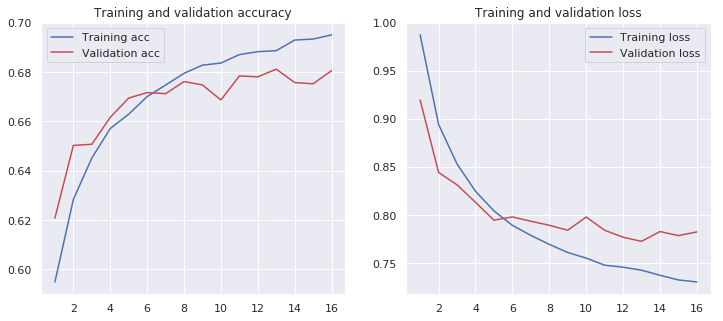

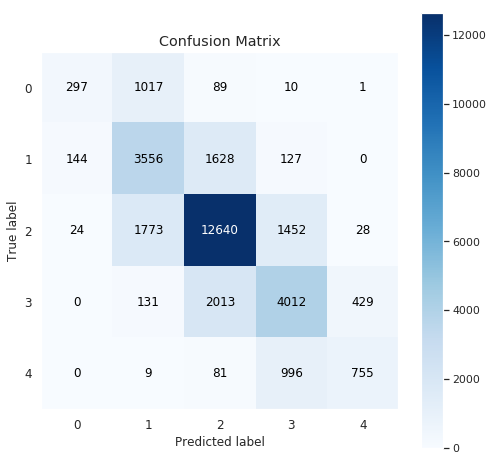

In [37]:
plot_history(history_lstm_cnn)

y_pred_lstm_cnn = dl_lstm_cnn_model.predict_classes(xvalid, verbose=1)
print()

print(classification_report(yvalid, y_pred_lstm_cnn))

print()
print("accuracy_score", accuracy_score(yvalid, y_pred_lstm_cnn))

print()
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(yvalid, y_pred_lstm_cnn, average='weighted'))
print("recall_score", recall_score(yvalid, y_pred_lstm_cnn, average='weighted'))
print("f1_score", f1_score(yvalid, y_pred_lstm_cnn, average='weighted'))

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, y_pred_lstm_cnn)


dl_performance_metrics_df.loc['LSTM_CNN']['training-time'] = elapsed_time
dl_performance_metrics_df.loc['LSTM_CNN']['accuracy'] = accuracy_score(yvalid, y_pred_lstm_cnn)
dl_performance_metrics_df.loc['LSTM_CNN']['F1-score'] = f1_score(yvalid, y_pred_lstm_cnn, average='weighted')

print("elapsed time:", round(elapsed_time), "seconds")

In [38]:
def build_dl_bidirectional_lstm_cnn_model(xtrain, ytrain, xvalid, yvalid, num_of_epochs, filename):

    ## Network architecture
    from keras.utils import to_categorical
    from keras.callbacks import ModelCheckpoint
    from keras.callbacks import EarlyStopping
    from keras.optimizers import RMSprop, SGD, adam
    from keras.layers import Masking
    from keras.initializers import Constant
    import time
    
    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)
    
    start_time = time.time()
    
    
    from numpy.random import seed
    seed(42)
    from tensorflow import set_random_seed
    set_random_seed(42)
    
    
    embedding_size = embedding_dim + 2
    batch_size = 256
    dropouts = 0.2
    epochs = num_of_epochs
    
    model=Sequential()
    model.add(Embedding(vocabulary_size, embedding_size, input_length=max_len, 
                        weights=[embedding_matrix], trainable = False))
    
    model.add(SpatialDropout1D(dropouts))
    
    model.add(Bidirectional(LSTM(int(embedding_size/2), recurrent_dropout=dropouts, dropout=dropouts, 
                   return_sequences=True)))
    
    model.add(Conv1D(128, kernel_size=2, strides = 1,  padding='valid', activation='relu'))
    model.add(Conv1D(256, kernel_size=3, strides = 1,  padding='valid', activation='relu'))
    model.add(Conv1D(512, kernel_size=5, strides = 1,  padding='valid', activation='relu'))
    
    model.add(GlobalMaxPooling1D())
    model.add(Dropout(dropouts))
    
    model.add(Dense(int(embedding_size/2), activation="relu"))
    model.add(Dropout(dropouts))
    
    model.add(Dense(5, activation='softmax'))

    print(model.summary())

    model.compile(loss='categorical_crossentropy', optimizer = 'nadam', metrics=['categorical_accuracy']) # RMSprop

    '''
    saves the model weights after each epoch if the val_acc loss decreased
    '''
    checkpointer = ModelCheckpoint(monitor='val_categorical_accuracy', mode='max', filepath=''+filename+'.hdf5', verbose=2, save_best_only=True)
    earlyStopping = EarlyStopping(monitor='val_categorical_accuracy', min_delta=0, patience=3, verbose=0, mode='max')

    history = model.fit(x = xtrain, y = to_categorical(ytrain), validation_data=(xvalid, to_categorical(yvalid)), epochs=epochs, batch_size=batch_size, verbose=2, callbacks=[checkpointer, earlyStopping])

    model = load_model(''+filename+'.hdf5')
    
    elapsed_time = time.time() - start_time
    
    return model, history, elapsed_time


In [39]:

dl_bidirectional_lstm_cnn_model, history_bidirectional_lstm_cnn, elapsed_time = build_dl_bidirectional_lstm_cnn_model(xtrain, ytrain, xvalid, yvalid, num_of_epochs=50, filename="bidirectional_lstm_cnn")
print("Elapsed time in seconds:", elapsed_time)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 56, 302)           5883564   
_________________________________________________________________
spatial_dropout1d_5 (Spatial (None, 56, 302)           0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 56, 302)           548432    
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 55, 128)           77440     
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 53, 256)           98560     
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 49, 512)           655872    
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 512)               0         
__________

### Model Summary

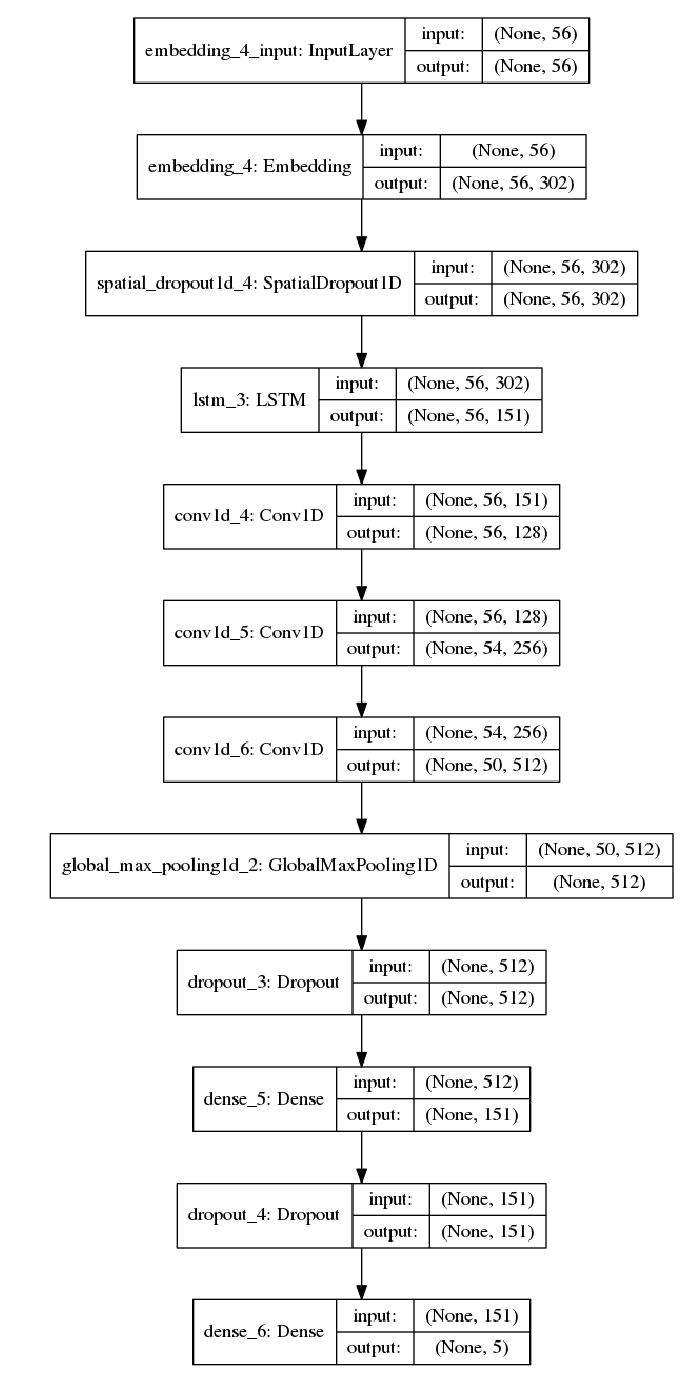

In [40]:
from keras.utils.vis_utils import plot_model

plot_model(dl_bidirectional_lstm_cnn_model, to_file='dl_bidirectional_lstm_cnn_model.png', show_shapes=True, show_layer_names=True)

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

img = Image.open('dl_lstm_cnn_model.png')
plt.rcParams["figure.figsize"] = (20,25)
plt.axis('off')
plt.grid(False)
imgplot = plt.imshow(img)

### Model Evaluation

31212/31212 [==============================] - 109s 3ms/step

              precision    recall  f1-score   support

           0       0.56      0.37      0.45      1414
           1       0.56      0.63      0.59      5455
           2       0.78      0.79      0.78     15917
           3       0.61      0.64      0.62      6585
           4       0.66      0.37      0.47      1841

   micro avg       0.69      0.69      0.69     31212
   macro avg       0.63      0.56      0.58     31212
weighted avg       0.69      0.69      0.68     31212


accuracy_score 0.6859541202101755

Weighted Averaged validation metrics
precision_score 0.6864532180654148
recall_score 0.6859541202101755
f1_score 0.6824342346831062

elapsed time: 1854 seconds


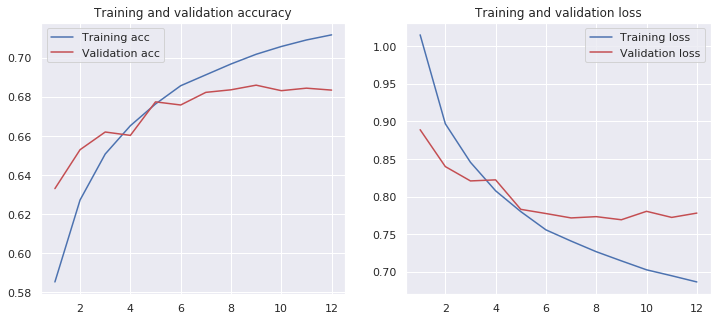

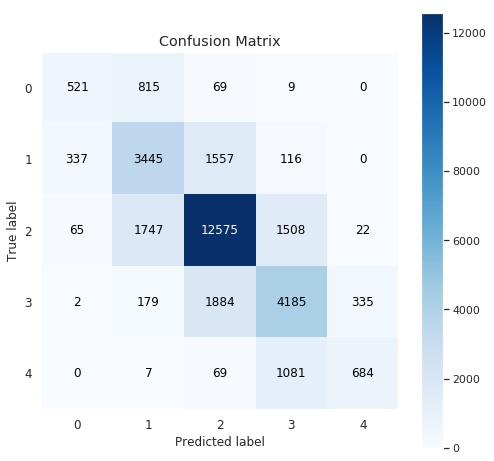

In [41]:
plot_history(history_bidirectional_lstm_cnn)

y_pred_bidirectional_lstm_cnn = dl_bidirectional_lstm_cnn_model.predict_classes(xvalid, verbose=1)
print()

print(classification_report(yvalid, y_pred_bidirectional_lstm_cnn))

print()
print("accuracy_score", accuracy_score(yvalid, y_pred_bidirectional_lstm_cnn))

print()
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(yvalid, y_pred_bidirectional_lstm_cnn, average='weighted'))
print("recall_score", recall_score(yvalid, y_pred_bidirectional_lstm_cnn, average='weighted'))
print("f1_score", f1_score(yvalid, y_pred_bidirectional_lstm_cnn, average='weighted'))

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, y_pred_bidirectional_lstm_cnn)


dl_performance_metrics_df.loc['BiLSTM_CNN']['training-time'] = elapsed_time
dl_performance_metrics_df.loc['BiLSTM_CNN']['accuracy'] = accuracy_score(yvalid, y_pred_bidirectional_lstm_cnn)
dl_performance_metrics_df.loc['BiLSTM_CNN']['F1-score'] = f1_score(yvalid, y_pred_bidirectional_lstm_cnn, average='weighted')

print("elapsed time:", round(elapsed_time), "seconds")

In [42]:
dl_performance_metrics_df.sort_values(by="accuracy", ascending=False)

,accuracy,F1-score,training-time
BiLSTM_CNN,0.685954,0.682434,1854.1
LSTM_CNN,0.681148,0.674293,2347.09
CNN,0.679034,0.672114,353.236
BiLSTM,0.678137,0.673839,1643.23
LSTM,0.674548,0.6713,2523.7


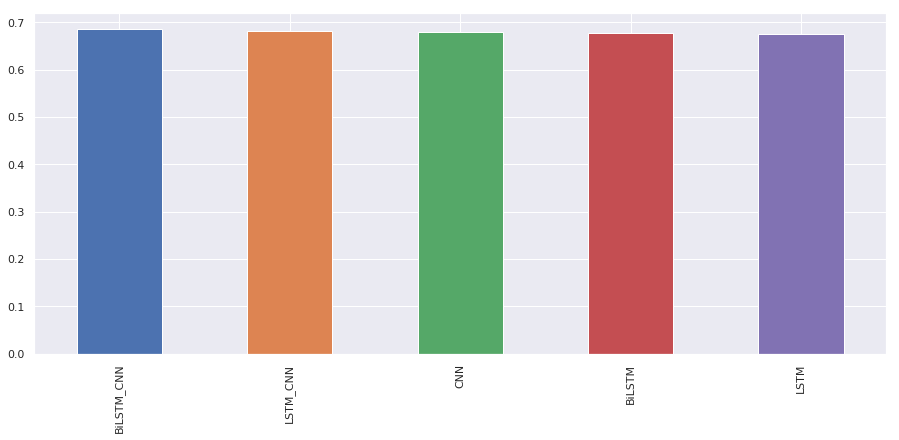

In [43]:
sns.set(rc={'figure.figsize':(15.27,6.27)})
dl_performance_metrics_df.sort_values(by="accuracy", ascending=False).accuracy.plot(kind="bar")

In [44]:
dl_performance_metrics_df.sort_values(by="F1-score", ascending=False)

,accuracy,F1-score,training-time
BiLSTM_CNN,0.685954,0.682434,1854.1
LSTM_CNN,0.681148,0.674293,2347.09
BiLSTM,0.678137,0.673839,1643.23
CNN,0.679034,0.672114,353.236
LSTM,0.674548,0.6713,2523.7


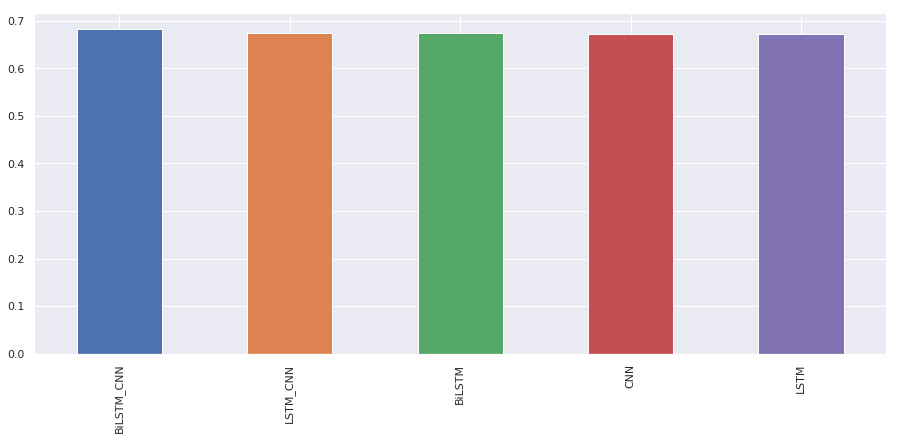

In [45]:
sns.set(rc={'figure.figsize':(15.27,6.27)})
dl_performance_metrics_df.sort_values(by="F1-score", ascending=False)["F1-score"].plot(kind="bar")

### Summarizing DL Models based on their training time with Trainable Word Embeddings as Feature Extraction / Representation

In [46]:
dl_performance_metrics_df.sort_values(by="training-time", ascending=False)

,accuracy,F1-score,training-time
LSTM,0.674548,0.6713,2523.7
LSTM_CNN,0.681148,0.674293,2347.09
BiLSTM_CNN,0.685954,0.682434,1854.1
BiLSTM,0.678137,0.673839,1643.23
CNN,0.679034,0.672114,353.236


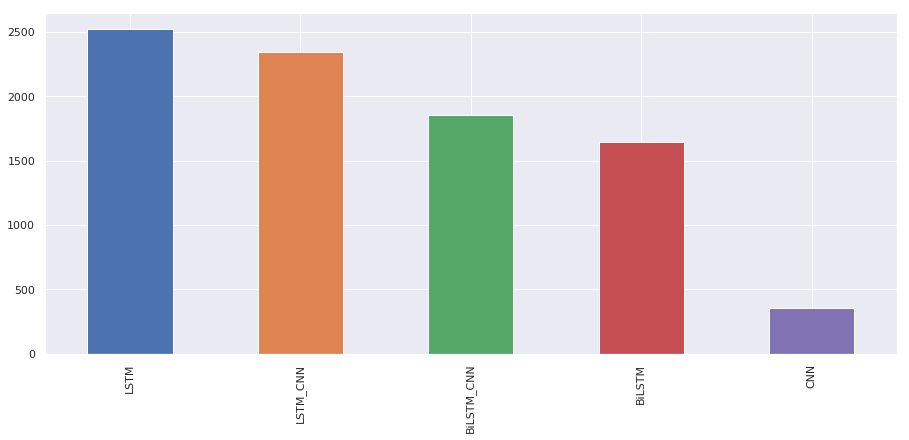

In [47]:
sns.set(rc={'figure.figsize':(15.27,6.27)})
dl_performance_metrics_df.sort_values(by="training-time", ascending=False)["training-time"].plot(kind="bar")

### Ensemble Models
Ensemble DL Models using the statistical mode for the predicted classed over the validation set.

In [48]:
y_pred_lstm = dl_lstm_model.predict_classes(xvalid, verbose=1)

y_pred_cnn = dl_cnn_model.predict_classes(xvalid, verbose=1)

y_pred_bidirectional_lstm = dl_bidirectional_lstm_model.predict_classes(xvalid, verbose=1)

y_pred_lstm_cnn = dl_lstm_cnn_model.predict_classes(xvalid, verbose=1)

y_pred_bidirectional_lstm_cnn =  dl_bidirectional_lstm_cnn_model.predict_classes(xvalid, verbose=1)


31212/31212 [==============================] - 107s 3ms/step


### Model Evaluation


              precision    recall  f1-score   support

           0       0.63      0.32      0.42      1414
           1       0.57      0.65      0.61      5455
           2       0.78      0.81      0.79     15917
           3       0.63      0.61      0.62      6585
           4       0.65      0.43      0.52      1841

   micro avg       0.70      0.70      0.70     31212
   macro avg       0.65      0.56      0.59     31212
weighted avg       0.69      0.70      0.69     31212


accuracy_score 0.696078431372549

Weighted Averaged validation metrics
precision_score 0.6945979233182082
recall_score 0.696078431372549
f1_score 0.6909636042151124



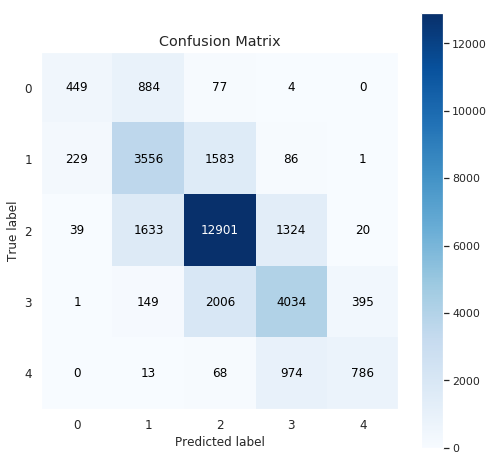

In [49]:
ensemble_all_dl_pred_df = pd.DataFrame({'model_lstm':y_pred_lstm,
                                                'model_bidirectional_lstm':y_pred_bidirectional_lstm,
                                                'model_cnn':y_pred_cnn,
                                                'model_bidirectional_lstm_cnn':y_pred_bidirectional_lstm_cnn,
                                                'model_lstm_cnn':y_pred_lstm_cnn,
                                                })


pred_mode = ensemble_all_dl_pred_df.agg('mode',axis=1)[0].values

print()
print(classification_report(yvalid, pred_mode))

print()
print("accuracy_score", accuracy_score(yvalid, pred_mode))

print()
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(yvalid, pred_mode, average='weighted'))
print("recall_score", recall_score(yvalid, pred_mode, average='weighted'))
print("f1_score", f1_score(yvalid, pred_mode, average='weighted'))

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, pred_mode)


In [50]:
xtest = tokenizer.texts_to_sequences(df_test.Phrase.values)
xtest = pad_sequences(xtest, maxlen=max_len)

y_pred_test_lstm = dl_lstm_model.predict_classes(xtest, verbose=1)
submission = pd.DataFrame()
submission['PhraseId'] = df_test.PhraseId
submission['Sentiment'] = y_pred_test_lstm
#submission['Sentiment'] = submission.Sentiment.astype(int)
submission.to_csv('submission_lstm.csv',index=False)


y_pred_test_bidirectional_lstm = dl_bidirectional_lstm_model.predict_classes(xtest, verbose=1)
submission = pd.DataFrame()
submission['PhraseId'] = df_test.PhraseId
submission['Sentiment'] = y_pred_test_bidirectional_lstm
#submission['Sentiment'] = submission.Sentiment.astype(int)
submission.to_csv('submission_bidirectional_lstm.csv',index=False)


y_pred_test_cnn = dl_cnn_model.predict_classes(xtest, verbose=1)
submission = pd.DataFrame()
submission['PhraseId'] = df_test.PhraseId
submission['Sentiment'] = y_pred_test_cnn
#submission['Sentiment'] = submission.Sentiment.astype(int)
submission.to_csv('submission_cnn.csv',index=False)


y_pred_test_lstm_cnn = dl_lstm_cnn_model.predict_classes(xtest, verbose=1)
submission = pd.DataFrame()
submission['PhraseId'] = df_test.PhraseId
submission['Sentiment'] = y_pred_test_lstm_cnn
#submission['Sentiment'] = submission.Sentiment.astype(int)
submission.to_csv('submission_lstm_cnn.csv',index=False)


y_pred_test_bidirectional_lstm_cnn = dl_bidirectional_lstm_cnn_model.predict_classes(xtest, verbose=1)
submission = pd.DataFrame()
submission['PhraseId'] = df_test.PhraseId
submission['Sentiment'] = y_pred_test_bidirectional_lstm_cnn
#submission['Sentiment'] = submission.Sentiment.astype(int)
submission.to_csv('submission_bidirectional_lstm_cnn.csv',index=False)

66292/66292 [==============================] - 225s 3ms/step


### Ensebling Predictions over the test set

In [51]:
ensemble_all_dl_pred_test_df = pd.DataFrame({'model_lstm':y_pred_test_lstm,
                                                'model_bidirectional_lstm':y_pred_test_bidirectional_lstm,
                                                'model_cnn':y_pred_test_cnn,
                                                'model_lstm_cnn':y_pred_test_lstm_cnn,
                                                'model_bidirectional_lstm_cnn':y_pred_test_bidirectional_lstm_cnn})


pred_test_mode = ensemble_all_dl_pred_test_df.agg('mode',axis=1)[0].values
submission = pd.DataFrame()
submission['PhraseId'] = df_test.PhraseId
submission['Sentiment'] = pred_test_mode
submission['Sentiment'] = submission.Sentiment.astype(int)
submission.to_csv('submission_ensemble.csv',index=False)
